___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 7<br><br>Image Classification with CNN<br><br>Malaria Data<br><h1>


# Dataset Info

The dataset contains 2 folders - 'parasitized', 'uninfected'

And a total of 27,558 images.

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

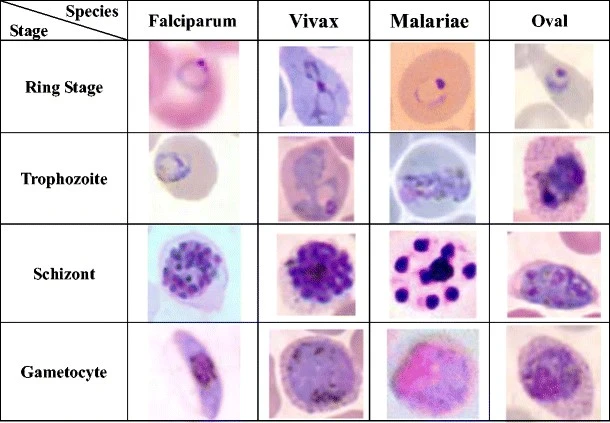

# Import Libraries and Export Images from Zip_File

```python
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")
 ```   

In [19]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

# TF_CPP_MIN_LOG_LEVEL is an environment variable used by TensorFlow, a popular machine learning library,
# to control the logging level of the TensorFlow runtime.
# Setting the value to "1" sets the logging level to filter out INFO messages,
# so that only more severe messages like warnings and errors are logged.
# This can be useful in reducing the amount of log output, especially in cases
# where the logs are not being actively monitored or where the information in the logs is not critical.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [21]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [22]:
tf.__version__

'2.10.1'

In [23]:
from tensorflow.keras.backend import clear_session
# Clear the session
clear_session()

```python
from google.colab import drive
drive.mount('/content/drive')
````

```python
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("cell_images.zip", "r")  # from local
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab notebooks/DL-7/cell_images.zip", "r")  # from drive
zip_ref.extractall()
zip_ref.close()
```

# Recognizing and Understanding Data

In [24]:
my_data_dir = "cell_images"

In [25]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir)

['test', 'train']

In [26]:
test_path = os.path.join(my_data_dir, "test")
train_path = os.path.join(my_data_dir, "train")

In [27]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [28]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [29]:
classes = os.listdir(train_path)
classes

['parasitized', 'uninfected']

In [30]:
import pathlib

data_dir = pathlib.Path(train_path)  # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# created a list of class_names from the subdirectories
print(class_names)

['parasitized' 'uninfected']


In [31]:
data_dir

WindowsPath('cell_images/train')

In [32]:
class_names

array(['parasitized', 'uninfected'], dtype='<U11')

**Let's check how many images there are.**

In [33]:
os.listdir(os.path.join(train_path, "parasitized"))[:5]

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png']

In [34]:
len(os.listdir(os.path.join(train_path, "parasitized"))), len(
    os.listdir(os.path.join(train_path, "uninfected"))
)

(12479, 12479)

In [35]:
len(os.listdir(os.path.join(test_path, "parasitized"))), len(
    os.listdir(os.path.join(test_path, "uninfected"))
)

(1300, 1300)

In [36]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
    print(
        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'."
    )

There are 2 directories and 0 images in 'cell_images'.
There are 2 directories and 0 images in 'cell_images\test'.
There are 0 directories and 1300 images in 'cell_images\test\parasitized'.
There are 0 directories and 1300 images in 'cell_images\test\uninfected'.
There are 2 directories and 0 images in 'cell_images\train'.
There are 0 directories and 12479 images in 'cell_images\train\parasitized'.
There are 0 directories and 12479 images in 'cell_images\train\uninfected'.


**Let's take an example images from both train-parasitized and train-uninfected folders to observe process**

In [157]:
# View a random image
import random


def view_random_image(target_dir, target_class):
    """Returns a randomly selected image after displaying it,
    given directory path and class names.
    Args:
        target_dir (str): Relative path to the target directory
        target_class (str): The name of the target class to randomly select a picture from
    Returns:
        img (np.ndarray): Randomly selected image as np.ndarray
    """
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # show the shape of the image

    return img

Image shape: (151, 178, 3)


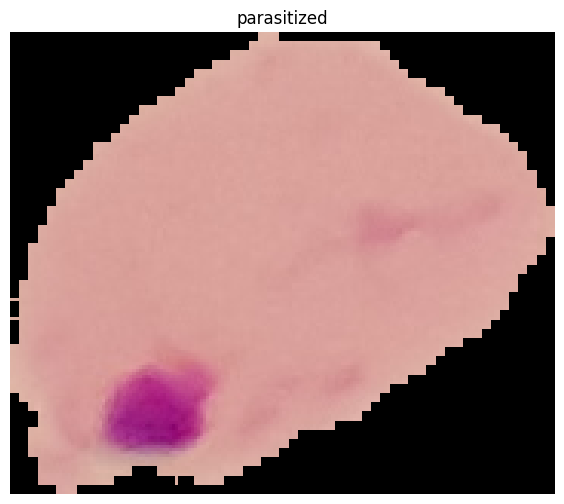

In [158]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path, target_class="parasitized")

Image shape: (127, 112, 3)


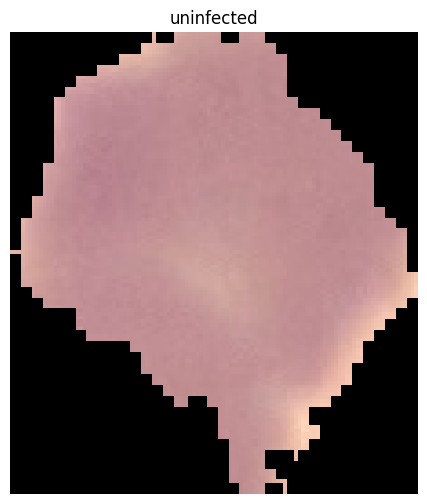

In [159]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path, target_class="uninfected")

Image shape: (193, 163, 3)


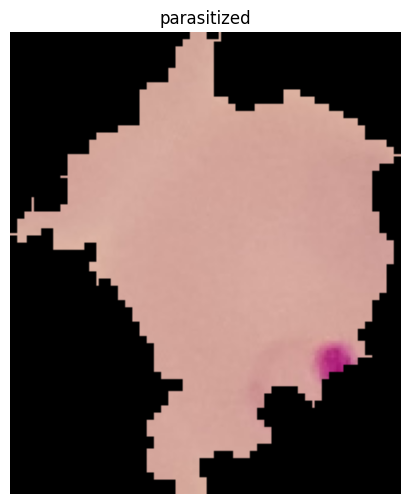

In [160]:
# View a random image from the training dataset
import random

img = view_random_image(
    target_dir=train_path, target_class=random.choice(class_names)
)  # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [161]:
uninfected_cell.shape

(130, 157, 3)

In [162]:
para_cell.shape

(145, 169, 3)

```python
x = []
y = []

for image in os.listdir(os.path.join(train_path, "uninfected")):
    img = imread(os.path.join(train_path, "uninfected", image))
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)
```

In [163]:
x = [
    imread(os.path.join(train_path, "uninfected", image)).shape[0]
    for image in os.listdir(os.path.join(train_path, "uninfected"))
    if "Thumbs.db" not in image
]
y = [
    imread(os.path.join(train_path, "uninfected", image)).shape[1]
    for image in os.listdir(os.path.join(train_path, "uninfected"))
    if "Thumbs.db" not in image
]

# This code creates two lists x and y using list comprehensions.
# Both lists are created by iterating over the files in the directory specified
# by os.path.join(train_path, "uninfected"). For each file in the directory,
# if the file name does not contain "Thumbs.db", the code reads the image using
# the imread function and appends the shape of the image to the respective list.
# The x list contains the first dimension (height) of each image’s shape,
# while the y list contains the second dimension (width) of each image’s shape.

In [164]:
x[:5]

[139, 136, 142, 112, 139]

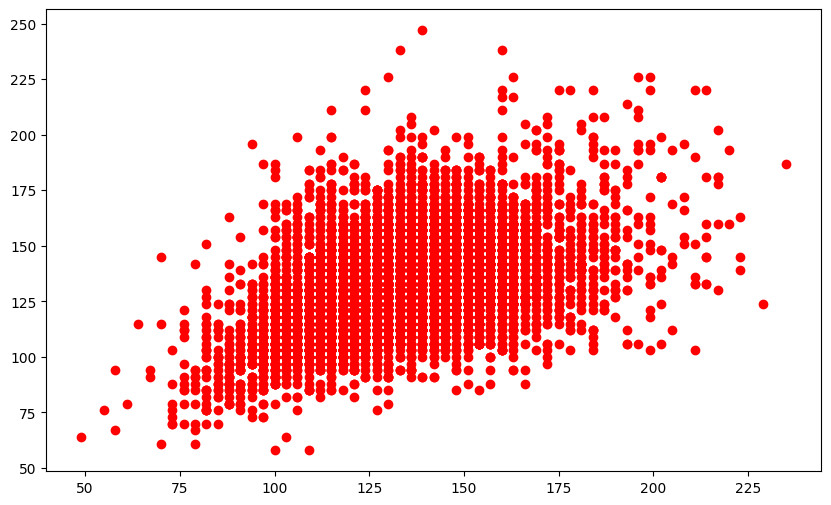

In [165]:
plt.scatter(x, y, color='red')

In [166]:
np.mean(x), np.median(x)

(131.64820899110507, 130.0)

In [167]:
np.mean(y), np.median(y)

(131.4041990544114, 130.0)

In [168]:
image_shape = (130, 130, 3)

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [169]:
uninfected_cell.max()

0.88235295

In [170]:
para_cell.max()

0.8901961

As we see above, all images have already been scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [171]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [172]:
# help(ImageDataGenerator)

In [173]:
image_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.10,
    height_shift_range=0.10,
    # rescale=1/255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=.3
)

validation_image_gen = ImageDataGenerator(validation_split=.3)
test_image_gen = ImageDataGenerator()

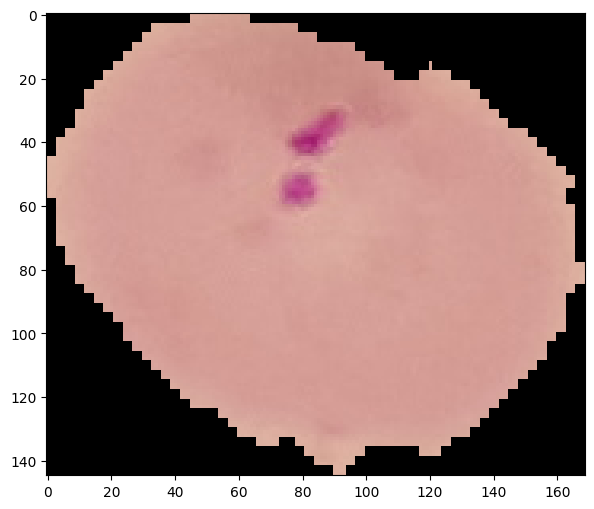

In [174]:
plt.imshow(para_cell);

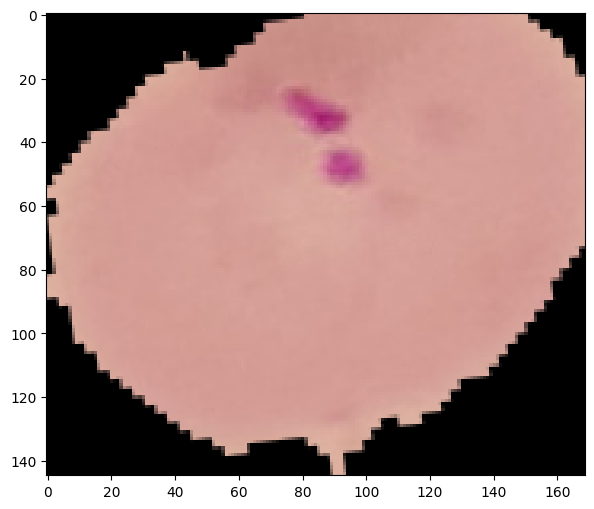

In [175]:
plt.imshow(image_gen.random_transform(para_cell));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [176]:
help(image_gen.flow_from_directory)
# Takes the path to a directory & generates batches of augmented data.

Help on method flow_from_directory in module keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain
          one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
          inside each of the subdirectories directory tree will be included
          in the generator. See [this script](
          https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
          for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The dimensions

In [177]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [178]:
test_image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [179]:
batch_size = 32

In [180]:
image_shape

(130, 130, 3)

In [181]:
train_path, test_path

('cell_images\\train', 'cell_images\\test')

In [182]:
train_image_gen = image_gen.flow_from_directory(
    directory=train_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    subset="training",
    shuffle=True,
    seed=42
)

Found 17472 images belonging to 2 classes.


In [183]:
val_image_gen = validation_image_gen.flow_from_directory(
    directory=train_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    subset="validation",
    shuffle=False,
    seed=42
)

Found 7486 images belonging to 2 classes.


In [184]:
test_image_gen = test_image_gen.flow_from_directory(
    directory=test_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
    seed=42
)

Found 2600 images belonging to 2 classes.


In [185]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [186]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [187]:
train_image_gen

In [188]:
train_image_gen[0][0].shape

(32, 130, 130, 3)

In [189]:
train_image_gen[0][0][0].shape

(130, 130, 3)

In [190]:
len(train_image_gen), len(test_image_gen)

(546, 82)

In [191]:
len(train_image_gen) * batch_size, len(test_image_gen) * batch_size

(17472, 2624)

In [192]:
# Get a sample of the training data batch
images, labels = train_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [193]:
# Get a sample of the testing data batch
images, labels = test_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Activation,
    Dropout,
    Flatten,
    Dense,
    Conv2D,
    MaxPooling2D,
)
from tensorflow.keras.callbacks import EarlyStopping

In [195]:
model1 = Sequential()

model1.add(
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation="relu")
)
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation("relu"))

model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation("sigmoid"))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [196]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [197]:
early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

In [199]:
model1.fit(
    train_image_gen,
    epochs=15,
    steps_per_epoch=len(train_image_gen),
    validation_data=val_image_gen,
    validation_steps=len(val_image_gen),
    callbacks=[early_stop],
    workers=20,  
)

Epoch 1/15
546/546 [==============================] - 21s 38ms/step - loss: 0.6735 - accuracy: 0.5890 - val_loss: 0.6640 - val_accuracy: 0.6038
Epoch 2/15
546/546 [==============================] - 21s 38ms/step - loss: 0.4882 - accuracy: 0.7565 - val_loss: 0.1820 - val_accuracy: 0.9365
Epoch 3/15
546/546 [==============================] - 22s 39ms/step - loss: 0.2384 - accuracy: 0.9265 - val_loss: 0.1717 - val_accuracy: 0.9285
Epoch 4/15
546/546 [==============================] - 21s 37ms/step - loss: 0.2370 - accuracy: 0.9276 - val_loss: 0.1661 - val_accuracy: 0.9245
Epoch 5/15
546/546 [==============================] - 21s 38ms/step - loss: 0.2146 - accuracy: 0.9318 - val_loss: 0.1880 - val_accuracy: 0.9173
Epoch 6/15
546/546 [==============================] - 21s 38ms/step - loss: 0.2166 - accuracy: 0.9348 - val_loss: 0.2151 - val_accuracy: 0.9010


In [200]:
model1.metrics_names

['loss', 'accuracy']

In [201]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.673,0.589,0.664,0.604
1,0.488,0.757,0.182,0.937
2,0.238,0.926,0.172,0.929
3,0.237,0.928,0.166,0.925
4,0.215,0.932,0.188,0.917


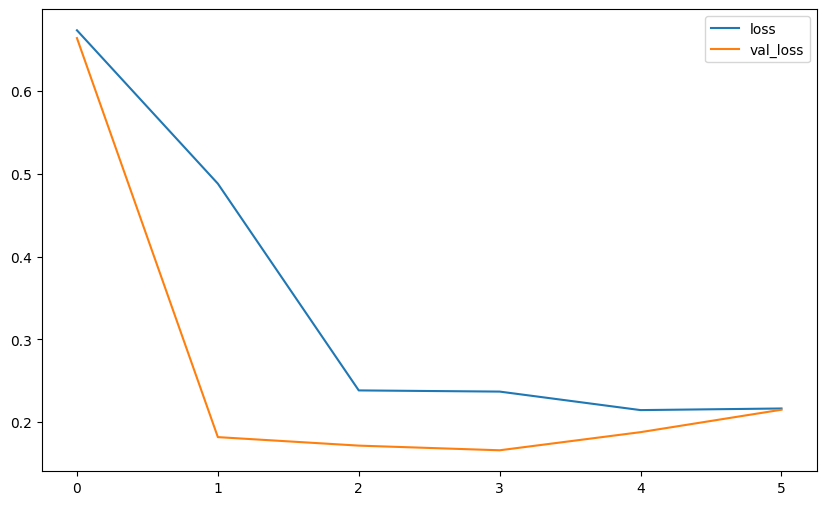

In [202]:
summary[["loss", "val_loss"]].plot();

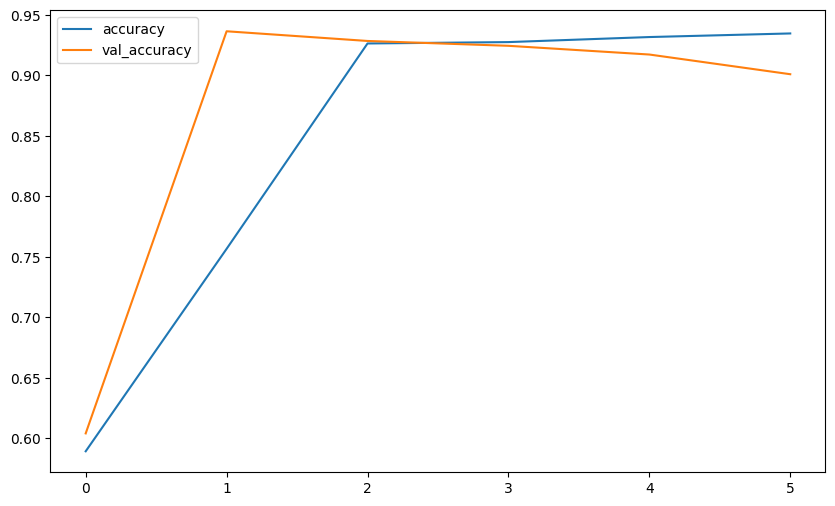

In [203]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [204]:
from sklearn.metrics import classification_report, confusion_matrix

In [205]:
score = model1.evaluate(test_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

82/82 [==============================] - 3s 34ms/step - loss: 0.1707 - accuracy: 0.9346
Test loss: 0.17068956792354584
Test accuracy: 0.9346153736114502


In [206]:
pred_prob = model1.predict(test_image_gen)

82/82 [==============================] - 3s 34ms/step


In [207]:
pred_prob

array([[5.7892799e-03],
       [2.9720888e-05],
       [1.8163843e-04],
       ...,
       [9.8430508e-01],
       [9.9434942e-01],
       [9.9773079e-01]], dtype=float32)

In [208]:
y_pred = pred_prob > 0.5

In [209]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [210]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [211]:
print(classification_report(y_test, y_pred, digits=3))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0      0.927     0.944     0.935      1300
           1      0.943     0.925     0.934      1300

    accuracy                          0.935      2600
   macro avg      0.935     0.935     0.935      2600
weighted avg      0.935     0.935     0.935      2600

[[1227   73]
 [  97 1203]]


# Modelling-2

In [90]:
# Clear the session
clear_session()

In [91]:
model2 = Sequential()

model2.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        input_shape=image_shape,
        padding="same",
        activation="relu",
    )
)
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation("relu"))
model2.add(Dropout(0.5))

model2.add(Dense(1))
model2.add(Activation("sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [92]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 65, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 65, 65, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 256)       2

In [93]:
early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

In [94]:
model2.fit(
    train_image_gen,
    epochs=15,
    steps_per_epoch=len(train_image_gen),
    validation_data=val_image_gen,
    validation_steps=len(val_image_gen),
    callbacks=[early_stop],
    workers=20,
)

Epoch 1/15
546/546 [==============================] - 80s 141ms/step - loss: 0.7788 - accuracy: 0.5262 - val_loss: 0.7030 - val_accuracy: 0.5000
Epoch 2/15
546/546 [==============================] - 75s 137ms/step - loss: 0.5027 - accuracy: 0.7015 - val_loss: 0.2040 - val_accuracy: 0.9200
Epoch 3/15
546/546 [==============================] - 75s 136ms/step - loss: 0.1979 - accuracy: 0.9406 - val_loss: 0.1907 - val_accuracy: 0.9416
Epoch 4/15
546/546 [==============================] - 75s 136ms/step - loss: 0.1876 - accuracy: 0.9429 - val_loss: 0.1439 - val_accuracy: 0.9531
Epoch 5/15
546/546 [==============================] - 75s 137ms/step - loss: 0.1741 - accuracy: 0.9475 - val_loss: 0.2608 - val_accuracy: 0.8807
Epoch 6/15
546/546 [==============================] - 75s 137ms/step - loss: 0.1630 - accuracy: 0.9520 - val_loss: 0.1871 - val_accuracy: 0.9427


In [95]:
model2.metrics_names

['loss', 'accuracy']

In [96]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.779,0.526,0.703,0.500
1,0.503,0.702,0.204,0.920
2,0.198,0.941,0.191,0.942
3,0.188,0.943,0.144,0.953
4,0.174,0.947,0.261,0.881


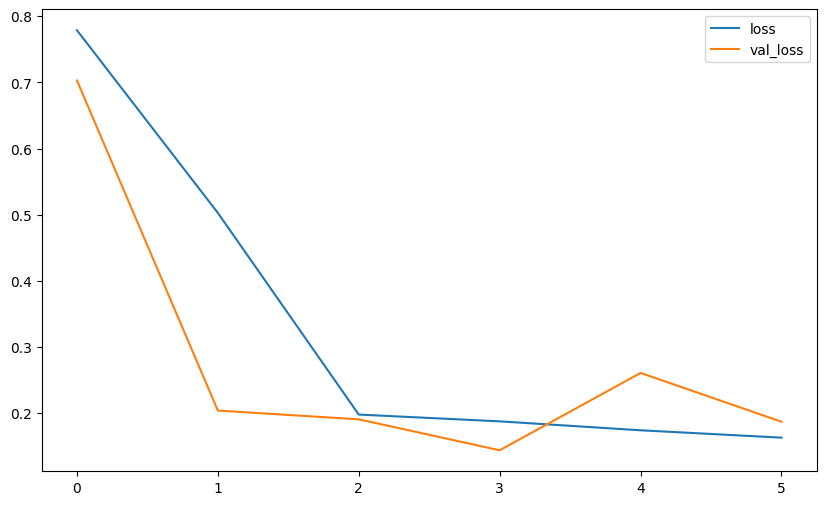

In [97]:
summary[["loss", "val_loss"]].plot()
plt.show()

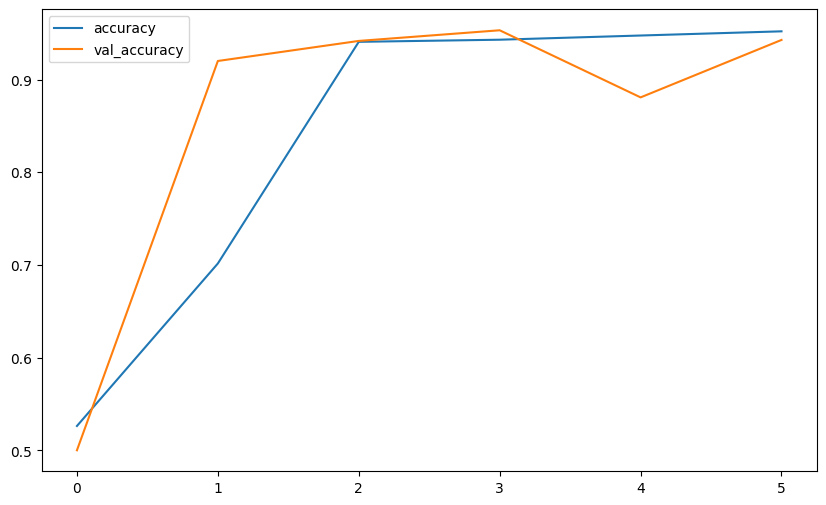

In [98]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [99]:
y_val = val_image_gen.classes

In [100]:
score = model2.evaluate(test_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

82/82 [==============================] - 4s 44ms/step - loss: 0.1649 - accuracy: 0.9450
Test loss: 0.16488046944141388
Test accuracy: 0.9449999928474426


In [101]:
score = model2.evaluate(val_image_gen)
print("val loss:", score[0])
print("val accuracy:", score[1])

234/234 [==============================] - 9s 37ms/step - loss: 0.1439 - accuracy: 0.9531
val loss: 0.14389891922473907
val accuracy: 0.9531124830245972


In [102]:
pred_prob1 = model2.predict(val_image_gen)

234/234 [==============================] - 8s 34ms/step


In [103]:

y_pred1 = pred_prob1 > 0.5

# Print the classification report
print(classification_report(y_val, y_pred1, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_val, y_pred1)) 

              precision    recall  f1-score   support

           0      0.959     0.947     0.953      3743
           1      0.947     0.960     0.953      3743

    accuracy                          0.953      7486
   macro avg      0.953     0.953     0.953      7486
weighted avg      0.953     0.953     0.953      7486

[[3543  200]
 [ 151 3592]]


In [104]:
pred_prob = model2.predict(test_image_gen)

82/82 [==============================] - 3s 34ms/step


In [105]:
y_pred = pred_prob > 0.5

# Print the classification report 
print(classification_report(y_test, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))  


              precision    recall  f1-score   support

           0      0.956     0.933     0.944      1300
           1      0.935     0.957     0.946      1300

    accuracy                          0.945      2600
   macro avg      0.945     0.945     0.945      2600
weighted avg      0.945     0.945     0.945      2600

[[1213   87]
 [  56 1244]]


In [106]:
model1.save("malaria_model.h5")

# Prediction

In [107]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [108]:
model = load_model("malaria_model_thrsh057.h5")

In [109]:
target_class = random.choice(class_names)
target_class

'parasitized'

In [110]:
random_image = random.sample(os.listdir(os.path.join(test_path, target_class)), 1)
random_image

['C97P58ThinF_IMG_20150917_150838_cell_160.png']

In [111]:
image_path = os.path.join(test_path, target_class, random_image[0])
image_path

'cell_images\\test\\parasitized\\C97P58ThinF_IMG_20150917_150838_cell_160.png'

In [112]:
my_image = image.load_img(image_path, target_size=image_shape)

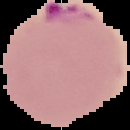

In [113]:
my_image

In [114]:
type(my_image)

PIL.Image.Image

In [115]:
# my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [116]:
my_image.shape

(130, 130, 3)

In [117]:
my_image = np.expand_dims(my_image, axis=0)

In [118]:
my_image.shape

(1, 130, 130, 3)

In [119]:
model.predict(my_image)

1/1 [==============================] - 0s 124ms/step


array([[0.6116252]], dtype=float32)

In [120]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [121]:
def pred_and_plot(model, img_size):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    target_class = random.choice(class_names)
    random_image = random.sample(os.listdir(os.path.join(test_path, target_class)), 1)
    img_path = os.path.join(test_path, target_class, random_image[0])
    img = image.load_img(img_path, target_size=img_size)
    img = np.array(img)

    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))
    print("prediction_probability: ", pred.max())

    # Get the predicted class
    if len(pred[0]) > 1:  # check for multi-class
        pred_class = class_names[pred.argmax()]  # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]  # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 85ms/step
prediction_probability:  0.3002764


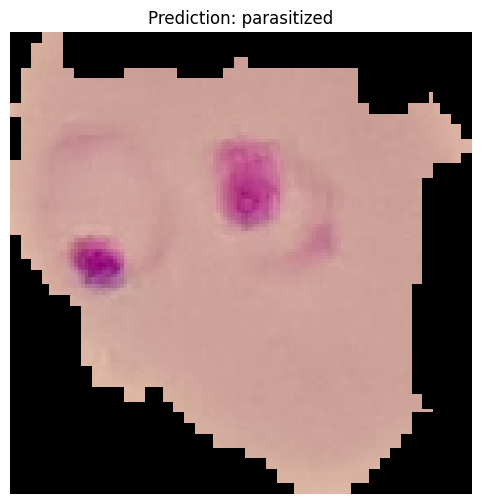

In [122]:
pred_and_plot(model, (130, 130))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___